
# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 1 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #



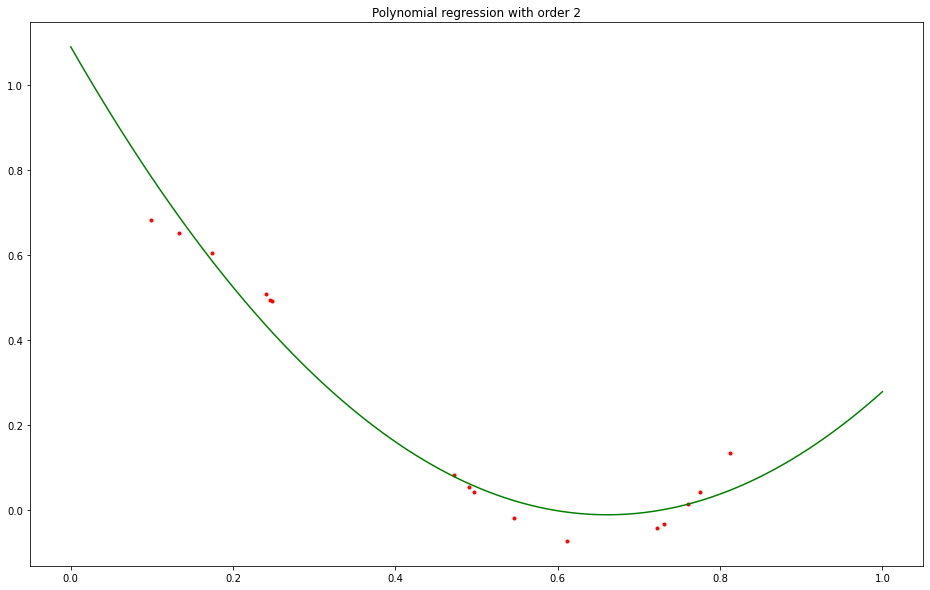


# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 2 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #



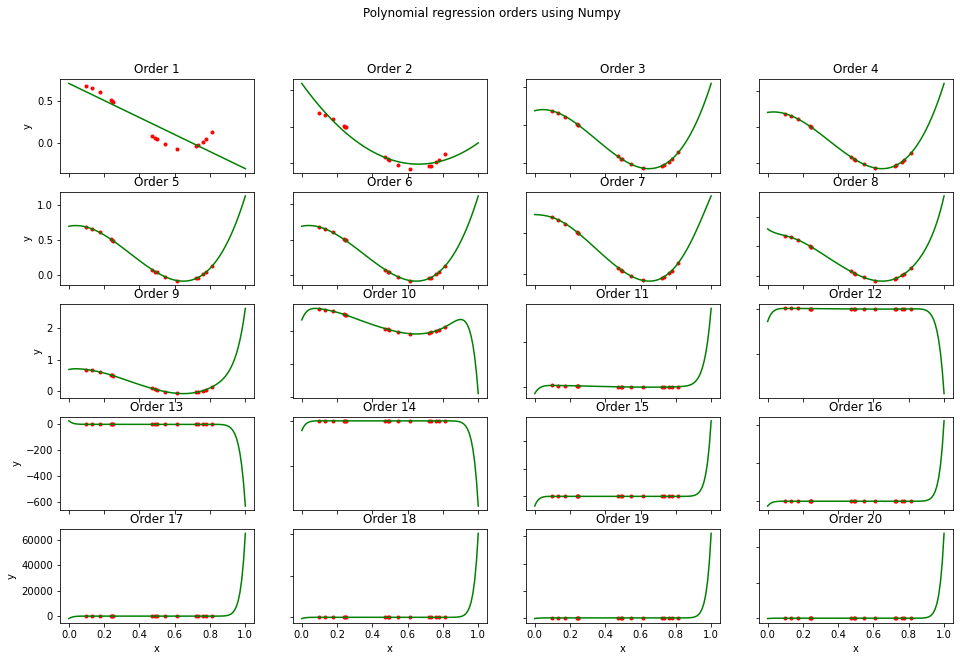


# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 3 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

 > Order(1) => squared error : 0.23444624114878998
 > Order(2) => squared error : 0.045527890679536144
 > Order(3) => squared error : 4.675072465134565e-05
 > Order(4) => squared error : 9.390247544466868e-06
 > Order(5) => squared error : 8.785086324615368e-06
 > Order(6) => squared error : 8.784226147040216e-06
 > Order(7) => squared error : 8.271588653006233e-06
 > Order(8) => squared error : 7.620955413879173e-06
 > Order(9) => squared error : 7.057269388462692e-06
 > Order(10) => squared error : 6.9141569109996424e-06
 > Order(11) => squared error : 5.160400704497333e-06
 > Order(12) => squared error : 2.1883091964800006e-06
 > Order(13) => squared error : 1.92032832432285e-06
 > Order(14) => square

In [201]:
# ------------------------------------------------------------------------------------------ #
# -------------------------------------- Imports ------------------------------------------- #
# ------------------------------------------------------------------------------------------ #

import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------------------------------------------------------ #
# ------------------------------------- Functions ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# function which structurated the output
def print_question(i):
    print("\n# ------------------------------------------------------------------------------------------ #")
    print("# ------------------------------------ Question {} ------------------------------------------ #".format(i))
    print("# ------------------------------------------------------------------------------------------ #\n")
    
# function which enables to visualize polynomial regression
def visualize(w):
    plt.plot(X, Y, 'r.')
    x = np.linspace(0., 1., 100)
    y = np.polyval(w, x)
    plt.plot(x, y, 'g-')
    plt.title('Polynomial regression with order {}'.format(len(w)-1))
    plt.show()

# ------------------------------------------------------------------------------------------ #
# --------------------------------------- Data --------------------------------------------- #
# ------------------------------------------------------------------------------------------ #
   
data = np.loadtxt('polynome.data')    

X = data [:, 0]
Y = data [:, 1]

# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 1 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

print_question(1)
w = np.polyfit(X, Y, 2)
visualize(w)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 2 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
print_question(2)
_min = 1
_max = 20
polynomial_orders = [(i,np.polyfit(X, Y, i)) for i in range(_min, _max+1)]

def range_visualize(W, X, Y):
    # plot grid
    len_ = len(W)
    columns = 4
    fig, axs = plt.subplots(math.ceil(len_/columns), columns)
    
    x = np.linspace(0., 1., 100)
    for i in range(len_):
        # regression
        y = np.polyval(W[i][1], x)
        
        # plot
        ax = axs[i//columns, i%columns]
        ax.plot(X, Y, 'r.')
        ax.plot(x, y, 'g-')
        ax.set_title('Order {}'.format(W[i][0]))
    
    # plot configuration
    fig.suptitle('Polynomial regression orders using Numpy')
    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='y')
    for ax in axs.flat:
        ax.label_outer()
    plt.show()
    
range_visualize(polynomial_orders, X, Y)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 3 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

print_question(3)
def squared_error(y_true, y_pred, order, log=True):
    se = 0
    for i in range(y_pred.shape[0]):
        se += (y_true[i] - y_pred[i])**2
    if log:
        print(" > Order({}) => squared error : {}".format(order,se))
    return se
se = [squared_error(np.polyval(poly[1],X), Y, poly[0]) for poly in polynomial_orders]
print("\nBest Order({}) with se = {}".format(polynomial_orders[np.argmin(se)][0], np.min(se)))

# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 4 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

print_question(4)
def cross_validation_hold_out(X, Y, training_ratio, order):
    # separate training and testing set
    temp = np.random.choice(np.arange(X.shape[0]), int(X.shape[0]*training_ratio), replace=False)
    split_indices = [i in temp for i in range(X.shape[0])]
    reversed_split_indices = [not i for i in split_indices]
    X_train = X[split_indices]
    Y_train = Y[split_indices]
    X_test = X[reversed_split_indices]
    Y_test = Y[reversed_split_indices]
    # performing training
    w = np.polyfit(X_train, Y_train, order)
    y_pred = np.polyval(w, X_test)
    return squared_error(Y_test, y_pred, order)

se = np.array([cross_validation_hold_out(X, Y, 0.7, poly[0]) for poly in polynomial_orders])
print("\nBest Order({}) with se = {}".format(polynomial_orders[np.argmin(se)][0], np.min(se)))

# ------------------------------------------------------------------------------------------ #
# ------------------------------------ Question 5 ------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
print_question(5)
def cross_validation_k_fold(X, Y, k, orders):
    if k == 1:
        raise Exception("K-Fold needs at least k >= 2, else use hold out method")
    # separate X,Y in k subdatasets
    Xs,Ys = [], []
    range_ = np.arange(X.shape[0])
    n = X.shape[0]//k
    for i in range(k-1):
        indices = np.random.choice(range_, n, replace=False)
        Xs.append(X[indices])
        Ys.append(Y[indices])
        # deleting used indices
        temp = []
        for i in range(range_.shape[0]):
            if range_[i] not in indices:
                temp.append(range_[i])
        range_ = np.array(temp)
    Xs.append(X[range_])
    Ys.append(Y[range_])
    Xs = np.array(Xs)
    Ys = np.array(Ys)
    
    # for each order compute se
    se = []
    for i in orders:
        # for k-fold compute empirical error
        empirical_error = []
        for current_k in range(k):
            X_train = np.hstack((Xs[l] for l in range(k) if l != current_k))
            Y_train = np.hstack((Ys[l] for l in range(k) if l != current_k))
            w = np.polyfit(X_train, Y_train, i)
            y_pred = np.polyval(w, Xs[current_k])
            empirical_error.append(squared_error(Ys[current_k], y_pred, i, False))
        se.append(np.mean(np.array(empirical_error)))
    return np.array(se)

se = cross_validation_k_fold(X, Y, 2, [poly[0] for poly in polynomial_orders])
for i in range(se.shape[0]):
    print(" > Order({}) => Mean empirical squared error : {}".format(polynomial_orders[i][0],se[i]))
print("\nBest Order({}) with se = {}".format(polynomial_orders[np.argmin(se)][0], np.min(se)))